<h1 style="text-align : center"> <font color="red" size=8>RANDOM FOREST ALGORITHM</h1>

## <font color="dark blue">WHAT IS RANDOM FOREST ALGORITHM?
- It is a type of Bagging algorithm.
- A Random Forest is a powerful ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting. It's a popular choice for both classification and regression tasks.
    
    
- Random Forest algorithm is a powerful tree learning technique in Machine Learning. It works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the dataset to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance.
    
    
- It is developed by __Leo Breiman and Adele Cutler__.

## <font color="dark blue">HOW RANDOM FOREST ALGORITHM WORKS?
- __Ensemble of Decision Trees__: Random Forest leverages the power of ensemble learning by constructing an army of Decision Trees. These trees are like individual experts, each specializing in a particular aspect of the data. Importantly, they operate independently, minimizing the risk of the model being overly influenced by the nuances of a single tree.
    
    
- __Random Feature Selection__: To ensure that each decision tree in the ensemble brings a unique perspective, Random Forest employs random feature selection. During the training of each tree, a random subset of features is chosen. This randomness ensures that each tree focuses on different aspects of the data, fostering a diverse set of predictors within the ensemble.
    
    - At each node of the tree, a random subset of features is considered for splitting. This helps to reduce correlation between trees and improve diversity
    
    
- __Bootstrap Aggregating or Bagging__: The technique of bagging is a cornerstone of Random Forest's training strategy which involves creating multiple bootstrap samples from the original dataset, allowing instances to be sampled with replacement. This results in different subsets of data for each decision tree, introducing variability in the training process and making the model more robust.
    
    
- __Decision Making and Voting__: When it comes to making predictions, each decision tree in the Random Forest casts its vote. For classification tasks, the final prediction is determined by the mode (most frequent prediction) across all the trees. In regression tasks, the average of the individual tree predictions is taken. This internal voting mechanism ensures a balanced and collective decision-making process.

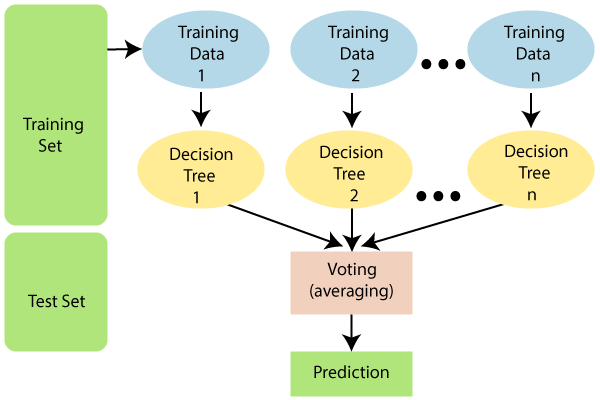

## <font color="dark blue">KEY FEATURES OF RANDOM FOREST ALGORITHM
- Reduced Overfitting
- High Accuracy
- Feature Importance
- Handles Missing Values
- Handles Imbalanced Datasets

## <font color="dark blue">WHY USE RANDOM FOREST ALGORITHM?
- It takes less training time as compared to other algorithms.
- It predicts output with high accuracy, even for the large dataset it runs efficiently.
- It can also maintain accuracy when a large proportion of data is missing.

## <font color="blue">CODE FOR RANDOM FOREST ALGORITHM

### <font color="orange">a. CODE FOR RANDOM FOREST CLASSIFIER

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Drop rows with missing target values
titanic_data = titanic_data.dropna(subset=['Survived'])

# Select relevant features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

# Convert categorical variable 'Sex' to numerical using .loc
X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})

# Handle missing values in the 'Age' column using .loc
X.loc[:, 'Age'].fillna(X['Age'].median(), inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy Of the Model",accuracy)
print()
print(classification_rep)

Accuracy Of the Model 0.7988826815642458

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### <font color="orange">b. CODE FOR RANDOM FOREST REGRESSOR

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california_housing = fetch_california_housing()
california_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_data['MEDV'] = california_housing.target

# Select relevant features and target variable
X = california_data.drop('MEDV', axis=1)
y = california_data['MEDV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error of the Model", mse)
print()
print("R2-Score of the Model",r2)

Mean Squared Error of the Model 0.2553684927247781

R2-Score of the Model 0.8051230593157366


## <font color="purple">PARAMETERS OF RANDOM FOREST CLASS

__1. n_estimators__:
- The number of decision trees in the forest. More trees generally lead to better performance, but also increase computational cost.

__2. criterion__:
- The function used to measure the quality of a split. Common options are "gini" and "entropy".

__3. max_depth__:
- The maximum depth of each tree. A deeper tree can capture more complex patterns, but it also increases the risk of overfitting.

__4. min_samples_split__:
- The minimum number of samples required to split an internal node.

__5. min_samples_leaf__:
- The minimum number of samples required to be at a leaf node.   

__6. max_features__:
- The number of features to consider when looking for the best split.
    - __sqrt__: The square root of the number of features.
    - __log2__: The base-2 logarithm of the number of features.

__7. bootstrap__:
- Whether to use bootstrap sampling to create different subsets of the training data for each tree.

__8. oob_score__:
- Whether to compute the out-of-bag (OOB) score. The OOB score is the accuracy of the model on samples that were not used to train a particular tree.

__9. n_jobs__:
- The number of CPU cores to use for parallel processing. A higher value can speed up training.

__10. random_state__:
- The seed used by the random number generator. This can be useful for reproducibility.

__11. class_weight__:
- Weights associated with classes in the form {class_label: weight}. This can be useful for imbalanced datasets.

__12. ccp_alpha__:
- Complexity parameter used for pruning.

__13. max_samples__:
- The maximum number of samples to draw from the training set for each base estimator.

__14. monotonic_cst__:
- Constraints on monotonic relationships between features and the target variable.

## <font color="dark blue">DIFFERENCE BETWEEN RANDOM FOREST & BAGGING

FEATURES | RANDOM FOREST | BAGGING
--------- | ------------- | --------
__Base Models___ | Decision Trees Only | Different
__Feature Selection__ | Random subset of features | All features is considered
__Bias-Variance Trade-off__ | Reduces both bias and variance | Reduces variance
__Spliting criteria__ | Node base Spliting | Tree base Spliting